# Exercice 0 : échauffement

Q1. Donnez, dans la direction 3’→ 5’, la séquence codée par le brin d'ADN suivant :

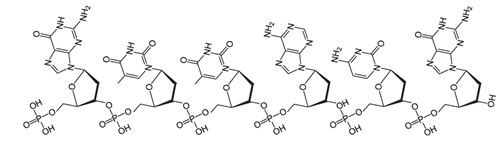

```markdown
GTTACG
```

Q2. Quelle est le peptide codé par la séquence d’ARNm suivante ?

3’– AUAACCAAUAUGCAAGUACAUGCA – 5’


```markdown
MNV
```

Q3.	Donnez toutes les séquences d'ARN (AUGC) possibles codant pour la séquence peptidique : TrpGluIleTyr.

```markdown
UGG(GAA/GAG)(AUA/AUC/AUU)(UAU/UAC)
```

# Exercice 1 : Annotation de cadres de lectures ouverts

Voici en cadeau le code génétique

In [ ]:
genecode = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
    'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
}


Q1. Téléchargez à partir de

https://www.ncbi.nlm.nih.gov/datasets/genome/

la séquence complète du génome de l’Adeno Associated Virus 2 (AAV2, identifiant NC_001401.2), **au format FASTA**.
La séquence doit faire 4679 bp.

Q2. Expliquez le format FASTA.

```markdown
Le format FASTA est un format de fichier texte utilisé pour représenter les séquences d'acides nucléiques (ADN et ARN) et de protéines.
Il est largement utilisé en bioinformatique pour stocker et partager des données de séquences.
```

## Cadres de lecture ouverts
L’annotation de séquences consiste à trouver les différents éléments présents dans une séquence (e.g. un génome), en particulier la position des différents gènes. Une manière grossière de trouver où sont les gènes est de trouver les cadres de lecture ouverts (Open Reading Frames ORFs) qui correspondent à toutes les sous-séquences entre un codon start et un codon STOP.

Q1.	Rappelez la définition d’un codon.

```markdown
Un codon est un code génétique créé par le vivant qui associe 3 nucléotides successifs.
Les codons sont utilisés par les ARNt (transfert) pour lire les données des acides aminés,
et créer les protéines.
```

Q2.	Quels sont les codons START canoniques. Pour quel(s) acide(s) aminé(s) codent-ils ? En quoi sont-ils spéciaux ?

```markdown
Pour les eucaryotes, c'est le codon 'AUG'. Il existe aussi pour les bactéries et les
archées les codons 'GUG' ou 'UUG'.
Le codon 'AUG' code l'acide aminé méthionine (M).
Ils sont spéciaux car ils signifient le début de la lecture de l'ARNt sur l'ARNm.
```

Q3.	Quels sont les codons STOP canoniques. Pour quel(s) acide(s) aminé(s) codent-ils ? En quoi sont-ils spéciaux ?

```markdown
Les codons stop sont 'UAA', 'UAG', 'UGA'.
Ils n'encodent aucun acide aminé.
Ils signifient la fin de la lecture de l'ARNt sur l'ARNm, et la libération de la protéine créée.
```

Q4. Dans quelle direction un brin d’ADN est-il lu ?

```markdown
Un brin d'ADN est lu de 5' vers 3'.
```

Q5. Comment se structure la molécule d'ADN dans une cellule ?

```markdown
La molécule d'ADN est composée de nucléotides (molécules composées de phosphate,
sucre désoxyribose et une base azotée), liés sur leur chaine de carbone de 3 à 5.
C'est une structure en double hélice.
```

Q6. Quel(s) brin(s) de la molécule d'ADN peut (peuvent) porter un gène ?

```markdown
Le brin matrice.
```

Q7. Qu’est-ce que le cadre de lecture ? Combien en existe-t-il ?

```markdown
Le cadre de lecture défini la manière dont les codons sont lus, et transformés en exons.
```

Q8. Quand utilise-t-on un cadre de lecture pour interpréter une séquence d’ADN ?

```markdown
Pour traduire une séquence de protéine.
```

Q9.	Donnez l’ensemble des ORFs présents dans le génome de l’AAV2. Présentez vos résultats au format FASTA où pour chaque ORF vous fournissez les informations :
```MARKDOWN
> pos début, pos fin, brin
séquence
```
où "pos début" est la position du premier nucléotide du codon START et "pos fin" est la position du dernier nucléotide du codon STOP (les positions sont comptées depuis le début du brin), brin est l'orientation du brin + ou - (+ est la séquence de base; - est le brin complément inverse) et séquence est simplement la séquence.

In [ ]:
def translate(seq):
    """Translates a nucleotide sequence into an amino acid sequence."""
    protein = ""
    for i in range(0, len(seq) - 2, 3):
        codon = seq[i:i+3]
        if codon in genecode:
            protein += genecode[codon]
        else:
          protein += "X"
    return protein


def reverse_complement(seq):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    return "".join(complement.get(base, base) for base in reversed(seq))

with open("sequence.fasta", "r") as file:
  genome = ""
  for line in file:
    if not line.startswith(">"):
        genome += line.strip()


orfs_number = 0
for strand in [genome, reverse_complement(genome)]:
  start_pos, end_pos = 0, 0
  for i in range(len(strand)):
    if (translate(strand[i:i+3]) == 'M'):
      start_pos = i
      for j in range(i + 3, len(strand), 3):
        if (translate(strand[j:j+3]) == '_'):
          end_pos = j
          orfs_number += 1
          print(f">{start_pos},{end_pos},{'+' if strand == genome else '-'}")
          print(translate(strand[start_pos:end_pos]))
          break

>238,268,+
MWSRWVFKPE
>320,2183,+
MPGFYEIVIKVPSDLDEHLPGISDSFVNWVAEKEWELPPDSDMDLNLIEQAPLTVAEKLQRDFLTEWRRVSKAPEALFFVQFEKGESYFHMHVLVETTGVKSMVLGRFLSQIREKLIQRIYRGIEPTLPNWFAVTKTRNGAGGGNKVVDECYIPNYLLPKTQPELQWAWTNMEQYLSACLNLTERKRLVAQHLTHVSQTQEQNKENQNPNSDAPVIRSKTSARYMELVGWLVDKGITSEKQWIQEDQASYISFNAASNSRSQIKAALDNAGKIMSLTKTAPDYLVGQQPVEDISSNRIYKILELNGYDPQYAASVFLGWATKKFGKRNTIWLFGPATTGKTNIAEAIAHTVPFYGCVNWTNENFPFNDCVDKMVIWWEEGKMTAKVVESAKAILGGSKVRVDQKCKSSAQIDPTPVIVTSNTNMCAVIDGNSTTFEHQQPLQDRMFKFELTRRLDHDFGKVTKQEVKDFFRWAKDHVVEVEHEFYVKKGGAKKRPAPSDADISEPKRVRESVAQPSTSDAEASINYADRYQNKCSRHVGMNLMLFPCRQCERMNQNSNICFTHGQKDCLECFPVSESQPVSVVKKAYQKLCYIHHIMGKVPDACTACDLVNVDLDDCIFEQ
>421,442,+
MGVAARF
>446,2183,+
MDLNLIEQAPLTVAEKLQRDFLTEWRRVSKAPEALFFVQFEKGESYFHMHVLVETTGVKSMVLGRFLSQIREKLIQRIYRGIEPTLPNWFAVTKTRNGAGGGNKVVDECYIPNYLLPKTQPELQWAWTNMEQYLSACLNLTERKRLVAQHLTHVSQTQEQNKENQNPNSDAPVIRSKTSARYMELVGWLVDKGITSEKQWIQEDQASYISFNAASNSRSQIKAALDNAGKIMSLTKTAPDYLVGQQPVEDISSNRIYKILELNGYDPQYAASVFLGWATKKFGKRNTIWLFGPATTGKTNIAEAIAHTVPFYG

Q10.	Combien d’ORFS trouvez-vous ?

In [ ]:
print(orfs_number)

117


Q11. Affichez les ORFs le long du génome sous forme d'un graphe (en x les positions le long du génome, en y "l'id" de l'ORF) où chaque ORF est représentée per une ligne horizontale entre les positions de départ de de fin et une valeur y par ORF.

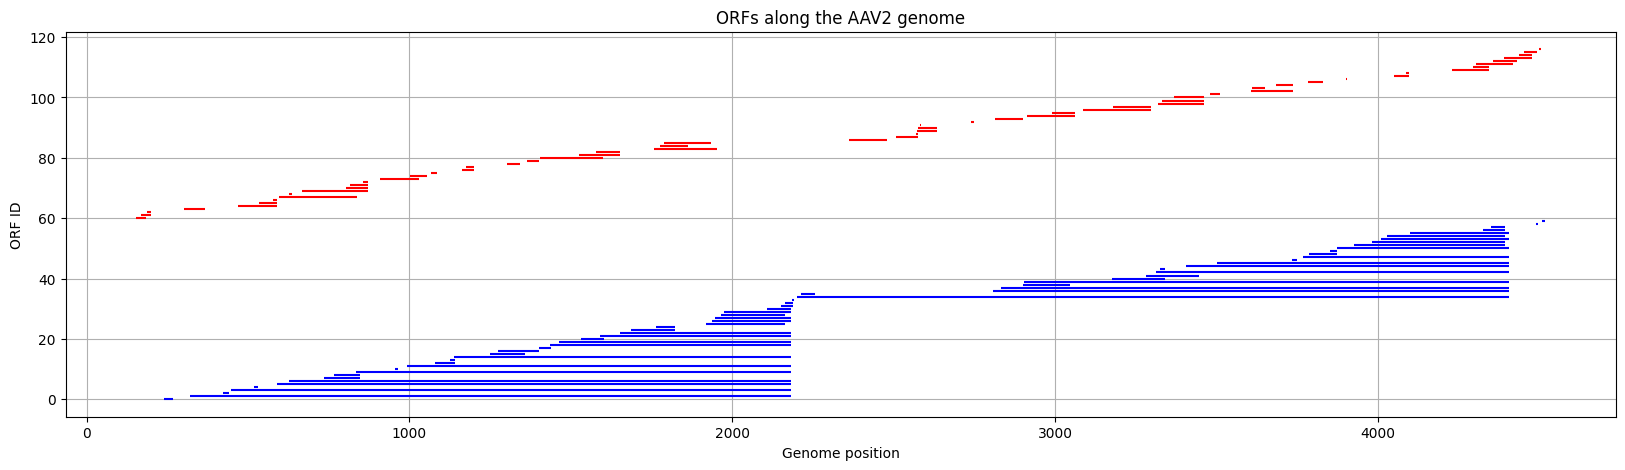

In [ ]:
import matplotlib.pyplot as plt

orfs = []
orf_id = 0
for strand in [genome, reverse_complement(genome)]:
    for i in range(len(strand)):
        if (translate(strand[i:i+3]) == 'M'):
            start_pos = i
            for j in range(i + 3, len(strand), 3):
                if (translate(strand[j:j+3]) == '_'):
                    end_pos = j
                    orfs.append((orf_id, start_pos, end_pos, "+" if strand == genome else "-"))
                    orf_id+=1
                    break

plt.figure(figsize=(20, 5))

for orf_id, start, end, strand in orfs:
    plt.hlines(orf_id, start, end, colors='blue' if strand == '+' else 'red')

plt.xlabel("Genome position")
plt.ylabel("ORF ID")
plt.title("ORFs along the AAV2 genome")
plt.grid(True)
plt.show()


Q12. En considérant que les différentes la probabilité d’apparition d’un nucléotide à chaque position le long d’un génome sont indépendantes, quelle est la probabilité d’apparition d’un codon START en fonction de la probabilité d’apparition des différents nucléotides $p_A,p_T,p_G,p_C$ ?

```markdown
P(AUG) = P(A) * P(U) * P(G)
P(ATG) = pA * pT * pG
P(AUG) = 1/64
```

Q13. Avec le même modèle, quelle est la probabilité d'apparition d'un codon STOP ?

```markdown
P(STOP) = P(TAA) + P(TAG) + P(TGA)
       = (pT * pA * pA) + (pT * pA * pG) + (pT * pG * pA)
       = 3/64

```

Q14. Affichez les probabilités d'apparition des codons START et STOP le long du génome de l’AAV2. Pour chaque position vous utilisez une fenêtre glissante de 501 nucléotide centrée sur cette position pour calculer la fréquence d’apparition des différents nucléotides (vous pouvez négliger les 501 premièrs et dernières nucléotides).

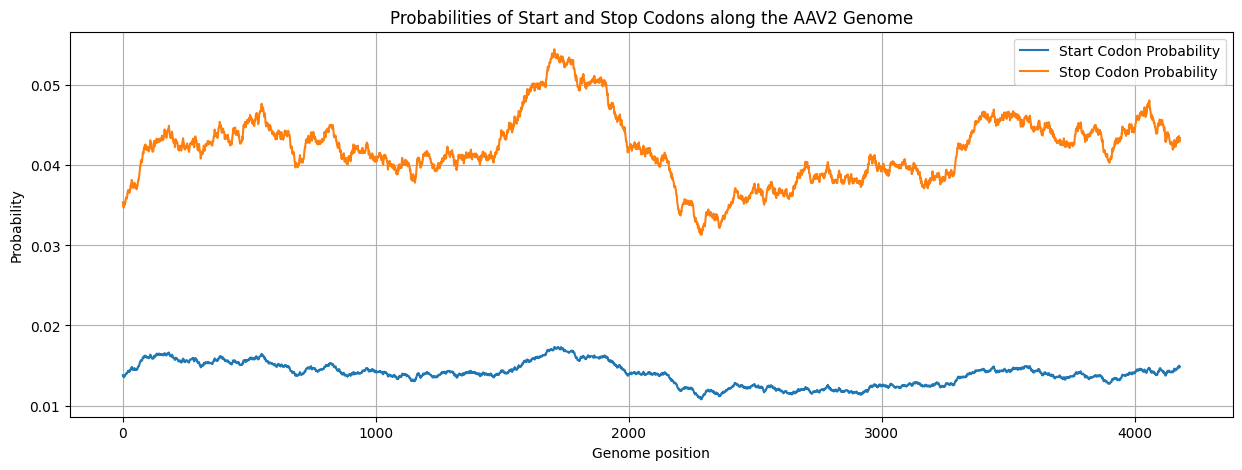

In [ ]:
import matplotlib.pyplot as plt

def calculate_probabilities(genome, window_size=501):
    start_codon = "ATG"
    stop_codons = ["TAA", "TAG", "TGA"]
    probabilities_start = []
    probabilities_stop = []

    for i in range(window_size // 2, len(genome) - window_size // 2):
        window = genome[i - window_size // 2 : i + window_size // 2]

        counts = {'A': 0, 'T': 0, 'G': 0, 'C': 0}
        for nucleotide in window:
          if nucleotide in counts:
            counts[nucleotide]+=1

        probabilities = {nucleotide: count / len(window) for nucleotide, count in counts.items()}

        prob_start = probabilities.get('A',0) * probabilities.get('T',0) * probabilities.get('G',0)
        probabilities_start.append(prob_start)

        prob_stop = 0
        for codon in stop_codons:
            prob_stop += probabilities.get(codon[0], 0) * probabilities.get(codon[1], 0) * probabilities.get(codon[2], 0)
        probabilities_stop.append(prob_stop)

    return probabilities_start, probabilities_stop

probabilities_start, probabilities_stop = calculate_probabilities(genome)

plt.figure(figsize=(15, 5))
plt.plot(range(len(probabilities_start)), probabilities_start, label="Start Codon Probability")
plt.plot(range(len(probabilities_stop)), probabilities_stop, label="Stop Codon Probability")

plt.xlabel("Genome position")
plt.ylabel("Probability")
plt.title("Probabilities of Start and Stop Codons along the AAV2 Genome")
plt.legend()
plt.grid(True)
plt.show()


Q15.	Téléchargez l’annotation du génome à partir de Genbank :

https://www.ncbi.nlm.nih.gov/datasets/gene/GCF_000838645.1/

Comparez les ORFS que vous avez trouvé avec le génome annoté (on s’intéresse à l’annotation « gene »).

In [ ]:
#Votre code ici

Q16. Qu’observez-vous ?

```markdown
Votre réponse ici
```

# Exercice 2 : biais d’utilisation des codons

Le code génétique étant redondant, plusieurs codons codent pour un même acide aminé. A l’inverse, cela veut dire que pour stocker un même acide aminé dans le génome, un organisme a différentes possibilités. Dans cet exercice, on va étudier si différents organismes ont des préférences différentes pour coder différents acides aminés ?

Q1. Récupperez les génomes des organismes suivants à partir de Genbank:
1.	AAV2 - NC_001401.2
2.	Plasmodium Falciparum 3D7 Chromosome 9 – AL844508
3.	Escherichia coli souche BL21 - NZ_CP053601
4.	Homo Sapiens Chromosome 10 build GRCh38.p14 - NC_000010.11

Q2. Calculez la fréquence d’apparition de chaque codon présents dans chacun de ces génomes.

In [ ]:
#Votre code ici

Q3. Affichez les résultats sous forme de heatmap avec en axe x les acides aminés et en axe y les codons. Chaque case représente en niveau de couleur la fréquence d'apparition d'un codon pour un acide aminé.

In [ ]:
#Votre code ici

Q4. Ces heatmaps sont-elles similaires ?

```markdown
Votre réponse ici
```

# Exercice 3 : optimisation de codons

L’exercice précédent nous a montré qu’il existait bien un biais dans l’utilisation des codons synonymes entre différents organismes. En pratique, si une séquence d’ADN d’un organisme ne suit pas son biais d'utilisation de codons, cela peut avoir un impact sur sa vitesse de traduction et donc la quantité de protéines associées.

Si on souhaite introduire dans un organisme un gène provenant d’un autre organisme il est donc préférable d’optimiser la séquence selon les biais de codons de l’organisme cible.

Q1. Créer un code qui prend en entrée une séquence d’ADN codante et une table de fréquence d’utilisation des codons pour un organisme et retourne la séquence produisant la même protéine mais utilisant uniquement les codons les plus fréquemment utilisés selon la table donnée.

In [ ]:
#Votre code ici

Q2. On va combiner les deux derniers exercices: écrivez un code qui prend en entrée un id de génome et une séquence à optimiser. Votre code télécharge le génome, calcule la table de biais de codons et optimise la séquence d'entrée pour cette table.

In [ ]:
 #Votre code ici